Microwave OI SST
* microwave at 25 km resolution
* https://www.remss.com/measurements/sea-surface-temperature/oisst-description/
* Download Data -> HTTP OI SSTs
* mw
* v05.1
* netcdf
* 2023
* 20230219120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
fname = "/Volumes/Turner2/FalseLowClouds/Analysis/Model/20230219120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc"

ds = xr.open_dataset(fname)
ds =  ds.squeeze()
ds

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    time              datetime64[ns] 2023-02-19T12:00:00
Data variables:
    analysed_sst      (lat, lon) float32 ...
    analysis_error    (lat, lon) float32 ...
    sea_ice_fraction  (lat, lon) float32 ...
    mask              (lat, lon) float32 ...
Attributes: (12/46)
    Conventions:                CF-1.8,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2023-03-16 20:25:31+0000 created by sst_fusio...
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

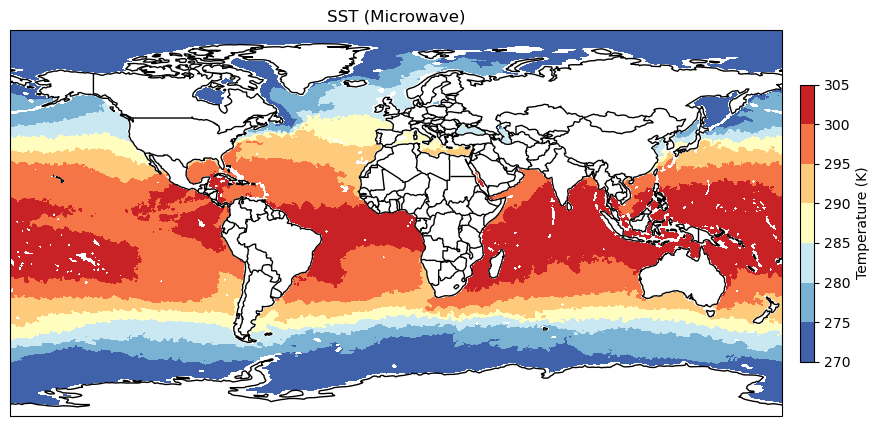

In [3]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu_r

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
c=ax.contourf(ds.lon, ds.lat, ds.analysed_sst, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('SST (Microwave)')
clb.set_label('Temperature (K)')

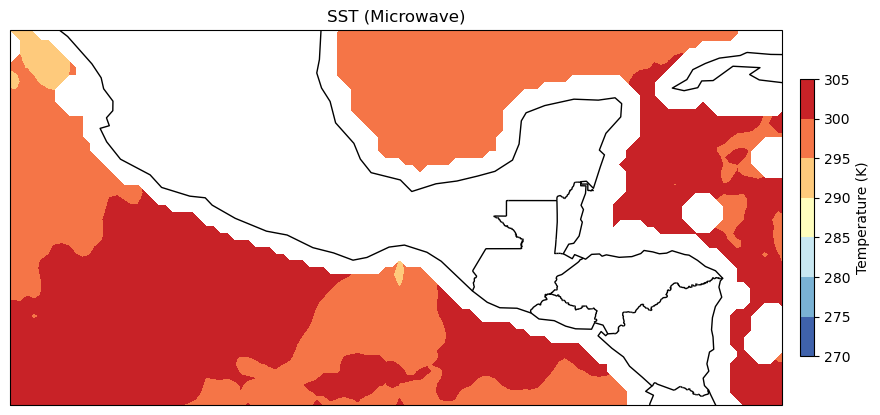

In [4]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu_r

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-109, -81, 24, 10.4], crs=ccrs.PlateCarree())
c=ax.contourf(ds.lon, ds.lat, ds.analysed_sst, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('SST (Microwave)')
clb.set_label('Temperature (K)')